<a href="https://colab.research.google.com/github/yqisthi/dicoding-ml/blob/main/RockPaperScissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri
<ul>
 <li>Nama: Yusuf Qisthi Abdul Jabbar</li>
 <li>Email: yqisthi2002@gmail.com</li>
 <li>Domisili: Kabupaten Bogor, Jawa Barat</li>
    </ul>

### Mengimport semua library yang dibutuhkan

In [ ]:
import tensorflow as tf 
import os
from tensorflow.keras import layers

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-24 05:47:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  1.07MB/s    in 4m 54s  

2021-04-24 05:52:42 (1.05 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = 'rockpaperscissors.zip.1'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
base_dir = './rockpaperscissors/rps-cv-images/'
os.listdir(base_dir) # Menampilkan directory yang ada di base

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

### Mengecek jumlah gambar pada setiap directory

In [ ]:
import glob
for file in os.listdir(base_dir):
    total = len(glob.glob(f'{base_dir}{file}/*.png'))
    print(f'jumlah gambar {file} = {total}')

jumlah gambar rock = 726
jumlah gambar scissors = 750
jumlah gambar README_rpc-cv-images.txt = 0
jumlah gambar paper = 712


### Membuat path file untuk train dan validasi untuk setiap kategori

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # Gambar diputar secara random
                    horizontal_flip=True, #Gambar dibalik horizontal secara random
                    shear_range = 0.2, # Gambar diputar berlawanan jarum jam (radian)
                    fill_mode = 'nearest') # metode nearest saya saya rasa paling akurat
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # Gambar diputar secara random
                    horizontal_flip=True, #Gambar dibalik horizontal secara random
                    shear_range = 0.2, # Gambar diputar berlawanan jarum jam (radian)
                    fill_mode = 'nearest')  # metode nearest saya saya rasa paling akurat
 

### Menetapkan properti untuk dataset

In [ ]:
batch_size = 32 # menetapkan batch untuk dataset
img_height = 200 # menetapkan tinggi gambar (default=200)
img_width = 300 # menetapkan lebar gambar (default=300)

### Membagi dataset menjadi train set dan validation set

In [ ]:
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.4, # Data validasi 40% dari dataset (sesuai perintah)
  subset="training", # dataset untuk training
  seed=123,
  image_size=(img_height, img_width), # properti gambar
  batch_size=batch_size) # batch size

Found 2188 files belonging to 3 classes.
Using 1313 files for training.


In [ ]:
validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.4, # Data validasi 40% dari dataset (sesuai perintah)
  subset="validation", # dataset untuk validasi
  seed=123,
  image_size=(img_height, img_width), # properti gambar
  batch_size=batch_size) # batch size

Found 2188 files belonging to 3 classes.
Using 875 files for validation.


In [ ]:
class_names = train_generator.class_names
print(class_names)

['paper', 'rock', 'scissors']


### Membuat model dengan metode sekuensial

In [ ]:
num_classes = 3 # Membagi multiclass menjadi 3 kelas

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Mengcompile dan mentrain model

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=7 # Epochs 7 paling ideal, jika berlebihan model akan overtraining
)

Epoch 1/7
42/42 [==============================] - 111s 3s/step - loss: 1.0541 - accuracy: 0.5890 - val_loss: 0.4262 - val_accuracy: 0.8686
Epoch 2/7
42/42 [==============================] - 104s 2s/step - loss: 0.4488 - accuracy: 0.8539 - val_loss: 0.3592 - val_accuracy: 0.8629
Epoch 3/7
42/42 [==============================] - 104s 2s/step - loss: 0.2514 - accuracy: 0.9126 - val_loss: 0.2098 - val_accuracy: 0.9097
Epoch 4/7
42/42 [==============================] - 104s 2s/step - loss: 0.1242 - accuracy: 0.9560 - val_loss: 0.1829 - val_accuracy: 0.9291
Epoch 5/7
42/42 [==============================] - 105s 2s/step - loss: 0.0630 - accuracy: 0.9816 - val_loss: 0.1109 - val_accuracy: 0.9577
Epoch 6/7
42/42 [==============================] - 108s 3s/step - loss: 0.0382 - accuracy: 0.9907 - val_loss: 0.1218 - val_accuracy: 0.9623
Epoch 7/7
42/42 [==============================] - 106s 3s/step - loss: 0.0533 - accuracy: 0.9857 - val_loss: 0.1210 - val_accuracy: 0.9669


### Data Testing

Saving scissors_ex.jpeg to scissors_ex (1).jpeg
Gambar ini termasuk dalam kategori scissors


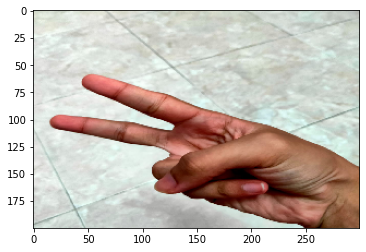

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 300))

  img_array = image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  

  print("Gambar ini termasuk dalam kategori {}".format(class_names[np.argmax(score)]))